In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from datetime import datetime

from scipy import stats
from scipy.stats import norm, skew

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# Ecuador
quito = pd.read_csv('./data/uio_clean.csv', encoding='utf-8')
quito.head()

id vendor_id      pickup_datetime     dropoff_datetime  pickup_longitude  \
0   1     Quito  2016-09-17 09:32:06  2016-09-17 10:05:51        -78.503922   
1   2     Quito  2016-09-18 04:03:20  2016-09-18 04:26:30        -78.440306   
2   3     Quito  2016-09-16 06:29:36  2016-09-18 06:41:33        -78.469551   
3   4     Quito  2016-09-18 05:57:47  2016-09-18 06:30:00        -78.558076   
4   5     Quito  2016-09-18 07:58:42  2016-09-18 08:14:29        -78.521818   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        -0.232824         -78.549447         -0.361363                  N   
1         0.006789         -78.490786         -0.104836                  N   
2        -0.143636         -78.470277         -0.131083                  N   
3        -0.278241         -78.430220         -0.201934                  N   
4        -0.208480         -78.504558         -0.222462                  N   

   trip_duration  dist_meters  wait_sec  
0           2025        24228       346  
1           1390        16680       456  
2         130317         1987       290  
3           1933        25146       302  
4            948         4625       314

# EDA

In [3]:
train = quito[0:90]
test = quito[91:100]

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
train.head()

id vendor_id      pickup_datetime     dropoff_datetime  pickup_longitude  \
0   1     Quito  2016-09-17 09:32:06  2016-09-17 10:05:51        -78.503922   
1   2     Quito  2016-09-18 04:03:20  2016-09-18 04:26:30        -78.440306   
2   3     Quito  2016-09-16 06:29:36  2016-09-18 06:41:33        -78.469551   
3   4     Quito  2016-09-18 05:57:47  2016-09-18 06:30:00        -78.558076   
4   5     Quito  2016-09-18 07:58:42  2016-09-18 08:14:29        -78.521818   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        -0.232824         -78.549447         -0.361363                  N   
1         0.006789         -78.490786         -0.104836                  N   
2        -0.143636         -78.470277         -0.131083                  N   
3        -0.278241         -78.430220         -0.201934                  N   
4        -0.208480         -78.504558         -0.222462                  N   

   trip_duration  dist_meters  wait_sec  
0           2025        24228       346  
1           1390        16680       456  
2         130317         1987       290  
3           1933        25146       302  
4            948         4625       314

In [6]:
test.head()

id vendor_id      pickup_datetime     dropoff_datetime  pickup_longitude  \
91  92     Quito  2016-09-19 05:01:05  2016-09-19 05:12:20        -78.487731   
92  93     Quito  2016-09-19 05:14:14  2016-09-19 05:25:15        -78.504975   
93  94     Quito  2016-09-19 12:17:16  2016-09-19 05:49:51        -78.514669   
94  95     Quito  2016-09-19 05:12:28  2016-09-19 05:49:50        -78.481854   
95  96     Quito  2016-09-19 05:49:55  2016-09-19 05:55:29        -78.533189   

    pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
91        -0.206846         -78.481903         -0.192141                  N   
92        -0.177025         -78.495228         -0.147104                  N   
93        -0.259978         -78.533425         -0.244500                  N   
94        -0.192142         -78.497651         -0.262063                  N   
95        -0.244135         -78.523652         -0.251909                  N   

    trip_duration  dist_meters  wait_sec  
91            676         2229       373  
92            662         6423        97  
93          19955         2993         2  
94           2243        16476       443  
95            334         1800        86

In [7]:
train.describe()

id  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  90.000000         90.000000        90.000000          90.000000   
mean   45.500000        -78.490905        -0.179486         -78.490402   
std    26.124701          0.032553         0.049042           0.033559   
min     1.000000        -78.558076        -0.283335         -78.558083   
25%    23.250000        -78.505220        -0.199292         -78.505352   
50%    45.500000        -78.496982        -0.180103         -78.491856   
75%    67.750000        -78.474104        -0.153001         -78.482260   
max    90.000000        -78.361079         0.006789         -78.361078   

       dropoff_latitude  trip_duration   dist_meters      wait_sec  
count         90.000000      90.000000     90.000000  9.000000e+01  
mean          -0.185677    7740.366667   6607.955556  8.460255e+06  
std            0.056037   35815.730942   8679.377251  8.025713e+07  
min           -0.361363      28.000000     38.000000  0.000000e+00  
25%           -0.211176     646.750000   2389.750000  1.140000e+02  
50%           -0.189492    1029.500000   4497.500000  3.395000e+02  
75%           -0.157032    1608.000000   7346.750000  5.460000e+02  
max           -0.011026  304091.000000  59823.000000  7.613864e+08

In [8]:
print('Train Dataset Shape : {0}'.format(train.shape))
print('Test Dataset Shape : {0}'.format(test.shape))

Train Dataset Shape : (90, 12)
Test Dataset Shape : (9, 12)


In [9]:
train.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

# Outlier

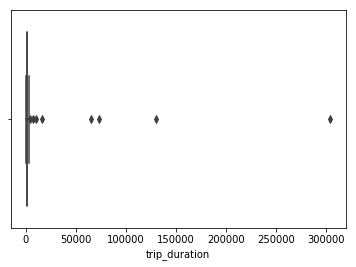

In [10]:
sns.boxplot(train['trip_duration'])

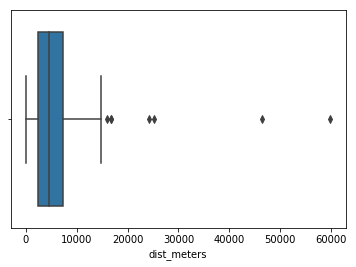

In [11]:
sns.boxplot(train['dist_meters'])

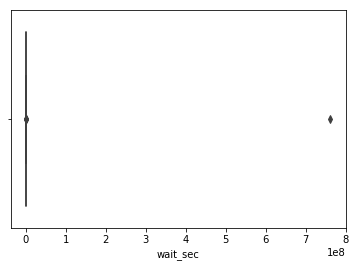

In [12]:
sns.boxplot(train['wait_sec'])

In [13]:
train = train[np.abs(train["dist_meters"]-train["dist_meters"].mean())<=(3*train["dist_meters"].std())] 

Skewness : 1.7701802137451057
Kurt : 3.681854618853786


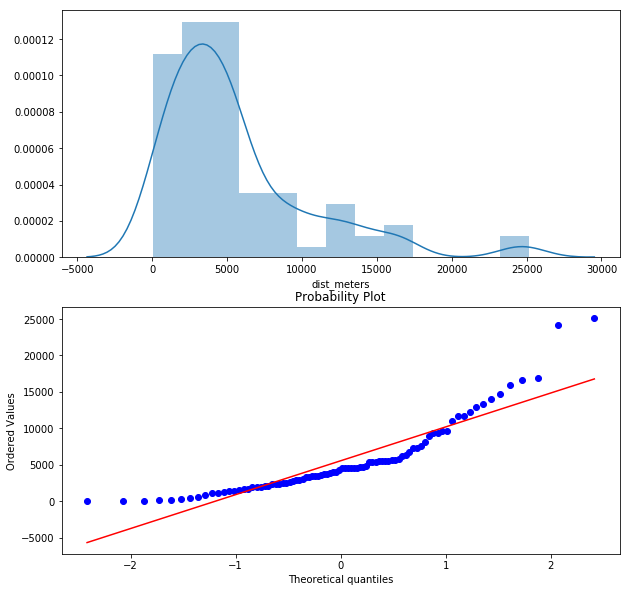

In [14]:
fig,ax = plt.subplots(2, 1, figsize=(10,10))
sns.distplot(train['dist_meters'], ax=ax[0])
stats.probplot(train["dist_meters"], dist='norm', fit=True, plot=ax[1])
print('Skewness : {0}'.format(train['dist_meters'].skew()))
print('Kurt : {0}'.format(train['dist_meters'].kurt()))

The graph above shows the distribution chart of Count. As a graph before the log is processed on the left, you can see that the concentration is very high between 0 and 10000. This means that it follows the normal distribution, as shown in the graph on the right, because it has a shifted power distribution.

((array([-2.41601382, -2.07398517, -1.87557193, -1.731585  , -1.6165249 ,
         -1.51958913, -1.43513839, -1.35983842, -1.29154588, -1.2287972 ,
         -1.17054616, -1.1160175 , -1.06461975, -1.01589071, -0.9694618 ,
         -0.92503399, -0.88236099, -0.84123728, -0.80148934, -0.76296913,
         -0.72554915, -0.68911866, -0.65358068, -0.61884968, -0.58484969,
         -0.55151282, -0.51877798, -0.48658991, -0.45489835, -0.42365729,
         -0.39282443, -0.36236063, -0.33222953, -0.30239712, -0.2728315 ,
         -0.24350251, -0.21438154, -0.18544129, -0.15665555, -0.12799906,
         -0.09944732, -0.07097643, -0.04256298, -0.01418385,  0.01418385,
          0.04256298,  0.07097643,  0.09944732,  0.12799906,  0.15665555,
          0.18544129,  0.21438154,  0.24350251,  0.2728315 ,  0.30239712,
          0.33222953,  0.36236063,  0.39282443,  0.42365729,  0.45489835,
          0.48658991,  0.51877798,  0.55151282,  0.58484969,  0.61884968,
          0.65358068,  0.68911866,  0.

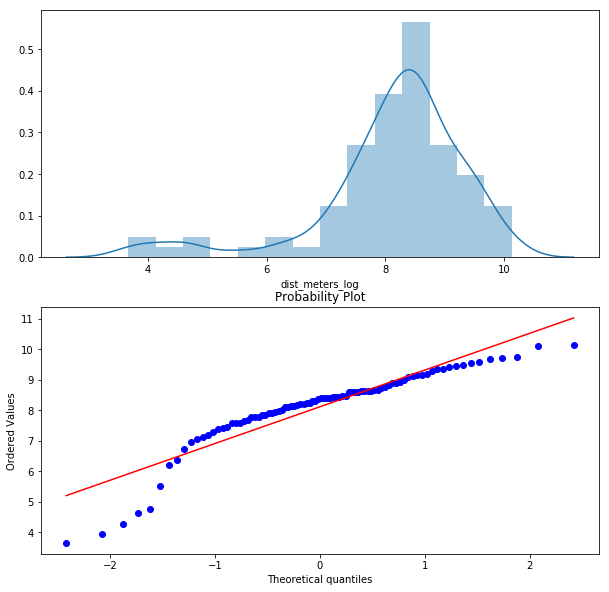

In [15]:
fig,ax = plt.subplots(2, 1, figsize=(10,10))

best = 'log'
train['dist_meters_log'] = np.log1p(train['dist_meters'])
sns.distplot(train['dist_meters_log'], ax=ax[0])
stats.probplot(train["dist_meters_log"], dist='norm', fit=True, plot=ax[1])

In [16]:
train.head()

id vendor_id      pickup_datetime     dropoff_datetime  pickup_longitude  \
0   1     Quito  2016-09-17 09:32:06  2016-09-17 10:05:51        -78.503922   
1   2     Quito  2016-09-18 04:03:20  2016-09-18 04:26:30        -78.440306   
2   3     Quito  2016-09-16 06:29:36  2016-09-18 06:41:33        -78.469551   
3   4     Quito  2016-09-18 05:57:47  2016-09-18 06:30:00        -78.558076   
4   5     Quito  2016-09-18 07:58:42  2016-09-18 08:14:29        -78.521818   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        -0.232824         -78.549447         -0.361363                  N   
1         0.006789         -78.490786         -0.104836                  N   
2        -0.143636         -78.470277         -0.131083                  N   
3        -0.278241         -78.430220         -0.201934                  N   
4        -0.208480         -78.504558         -0.222462                  N   

   trip_duration  dist_meters  wait_sec  dist_meters_log  
0           2025        24228       346        10.095306  
1           1390        16680       456         9.722026  
2         130317         1987       290         7.594884  
3           1933        25146       302        10.132494  
4            948         4625       314         8.439448

In [17]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)

train['weekday_name'] = train['pickup_datetime'].dt.weekday_name
train['day'] = train['pickup_datetime'].dt.day
train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month

train.head()


id vendor_id     pickup_datetime     dropoff_datetime  pickup_longitude  \
0   1     Quito 2016-09-17 09:32:06  2016-09-17 10:05:51        -78.503922   
1   2     Quito 2016-09-18 04:03:20  2016-09-18 04:26:30        -78.440306   
2   3     Quito 2016-09-16 06:29:36  2016-09-18 06:41:33        -78.469551   
3   4     Quito 2016-09-18 05:57:47  2016-09-18 06:30:00        -78.558076   
4   5     Quito 2016-09-18 07:58:42  2016-09-18 08:14:29        -78.521818   

   pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0        -0.232824         -78.549447         -0.361363                  N   
1         0.006789         -78.490786         -0.104836                  N   
2        -0.143636         -78.470277         -0.131083                  N   
3        -0.278241         -78.430220         -0.201934                  N   
4        -0.208480         -78.504558         -0.222462                  N   

   trip_duration  dist_meters  wait_sec  dist_meters_log weekday_name  day  \
0           2025        24228       346        10.095306     Saturday   17   
1           1390        16680       456         9.722026       Sunday   18   
2         130317         1987       290         7.594884       Friday   16   
3           1933        25146       302        10.132494       Sunday   18   
4            948         4625       314         8.439448       Sunday   18   

   year  month  
0  2016      9  
1  2016      9  
2  2016      9  
3  2016      9  
4  2016      9

In [18]:
categorical = ["vendor_id", 'weekday_name', 'day', 'year', 'month']
numeric = ["trip_duration", "dist_meters", "wait_sec"]

In [19]:
for idx in categorical:
    train[idx].astype('category')

In [94]:
# fig,axes = plt.subplots(ncols=2 ,nrows=2)
# fig.set_size_inches(15,10)
# sns.boxplot(data=train,x='vendor_id',y='dist_meters',ax=axes[0][0])
# sns.boxplot(data=train,x='month',y='dist_meters',ax=axes[0][0])
# sns.boxplot(data=train,x='year',y='dist_meters',ax=axes[0][0])
# sns.boxplot(data=train,x='weekday_name',y='dist_meters',ax=axes[0][0])


fig1,axes1 = plt.subplots()
fig1.set_size_inches(15,10)
sns.boxplot(data=train,x='weekday_name', y='dist_meters')

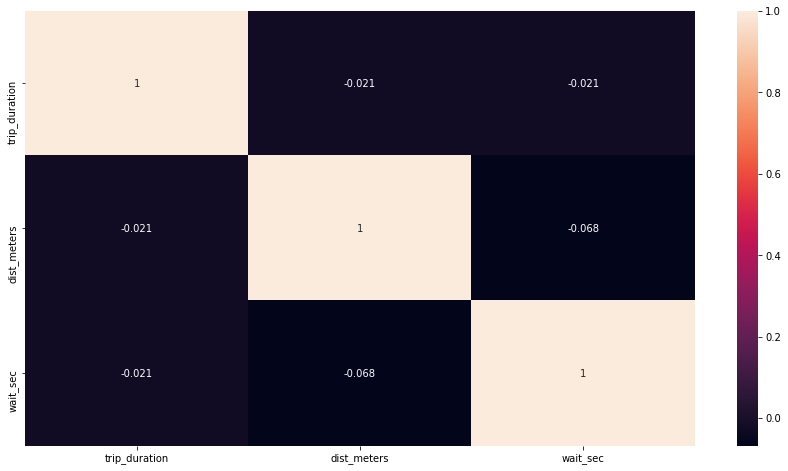

In [20]:
plt.subplots(figsize=(15,8))
sns.heatmap(train[numeric].corr(),annot=True)

[Text(0.5,1,'WeekDay Vs dist_meters')]

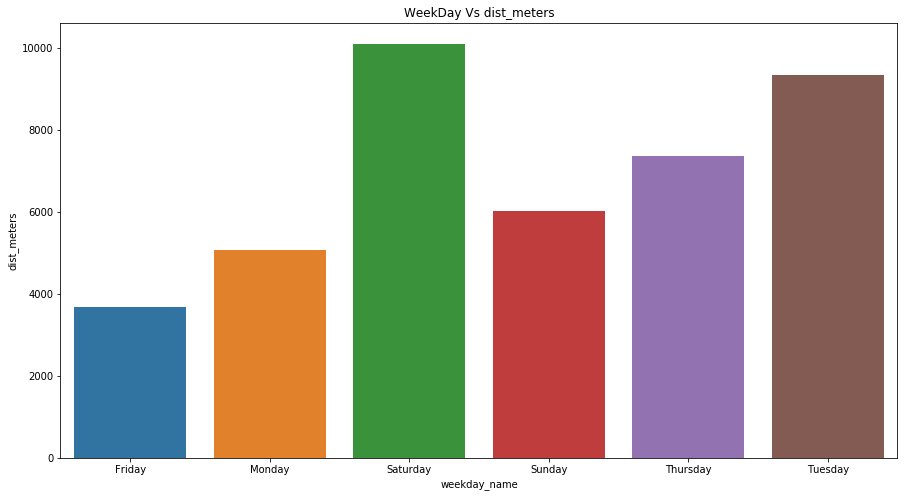

In [21]:
plt.figure(figsize=(15,8))
weekdayagg = pd.DataFrame(train.groupby('weekday_name')['dist_meters'].mean()).reset_index()
sns.barplot(data=weekdayagg, x='weekday_name',y='dist_meters', ci=False).set(title = 'WeekDay Vs dist_meters')

In [28]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'